Pengolahan Sinyal Digital - Kuliah 6
Penyaringan sinyal, filter BIH dan FIR

Filter IIR
Filter IIR adalah jenis filter digital yang memiliki respon impuls yang tidak terbatas dalam waktu. Ini berarti bahwa output dari filter IIR bergantung tidak hanya pada input saat ini tetapi juga pada input dan output sebelumnya. Filter IIR sering kali digunakan karena mereka dapat mencapai karakteristik filter yang diinginkan dengan urutan yang lebih rendah dibandingkan dengan filter FIR.

Sifat-sifat IIR:
Respon tak hingga: Karena memiliki umpan balik, respon impuls dari filter IIR tidak terbatas dalam waktu.
- Efisiensi: Untuk mencapai spesifikasi filter yang sama, filter IIR umumnya memerlukan urutan yang lebih rendah dibandingkan filter FIR.
- Stabilitas: Filter IIR bisa menjadi tidak stabil jika tidak dirancang dengan hati-hati. Stabilitas ditentukan oleh lokasi pole pada bidang z.

Perancangan Filter IIR
Filter IIR sering kali dirancang menggunakan metode transformasi analog ke digital seperti metode bilinear transform atau transformasi z langsung. Beberapa jenis filter analog yang sering digunakan adalah Butterworth, Chebyshev, dan Elliptic.

Respon Frekuensi Filter IIR :

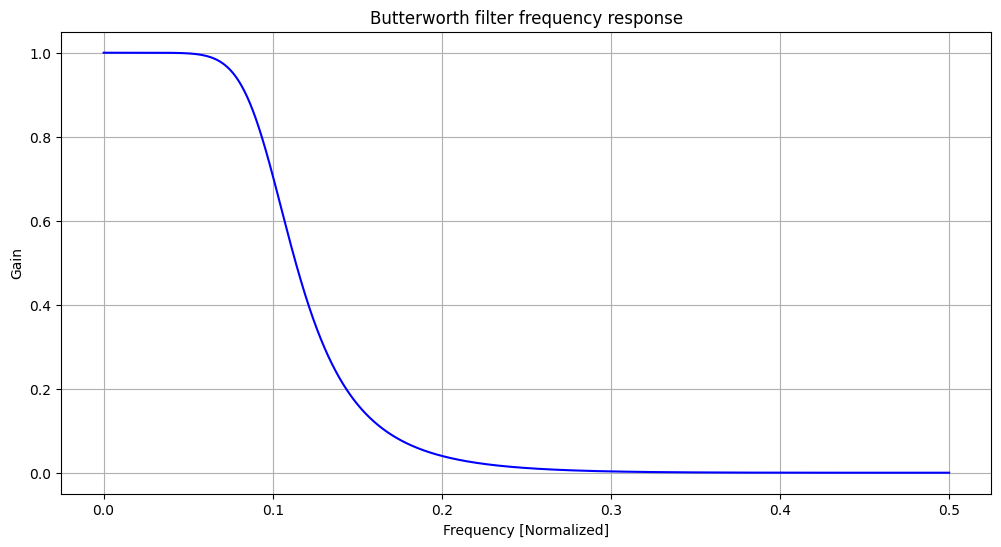

In [3]:
import numpy as np
from scipy.signal import iirfilter, freqz
import matplotlib.pyplot as plt

# Parameter filter
order = 4
cutoff = 0.2  # Cutoff frequency as a fraction of the Nyquist rate

# Desain filter IIR menggunakan Butterworth
b, a = iirfilter(order, cutoff, btype='low', analog=False, ftype='butter')

# Frekuensi respon dari filter
w, h = freqz(b, a, worN=8000)

# Plot respon frekuensi
plt.figure(figsize=(12, 6))
plt.plot(0.5 * w / np.pi, np.abs(h), 'b')
plt.title("Butterworth filter frequency response")
plt.xlabel('Frequency [Normalized]')
plt.ylabel('Gain')
plt.grid()
plt.show()


Sinyal Asli dan Sinyal Hasil Filter

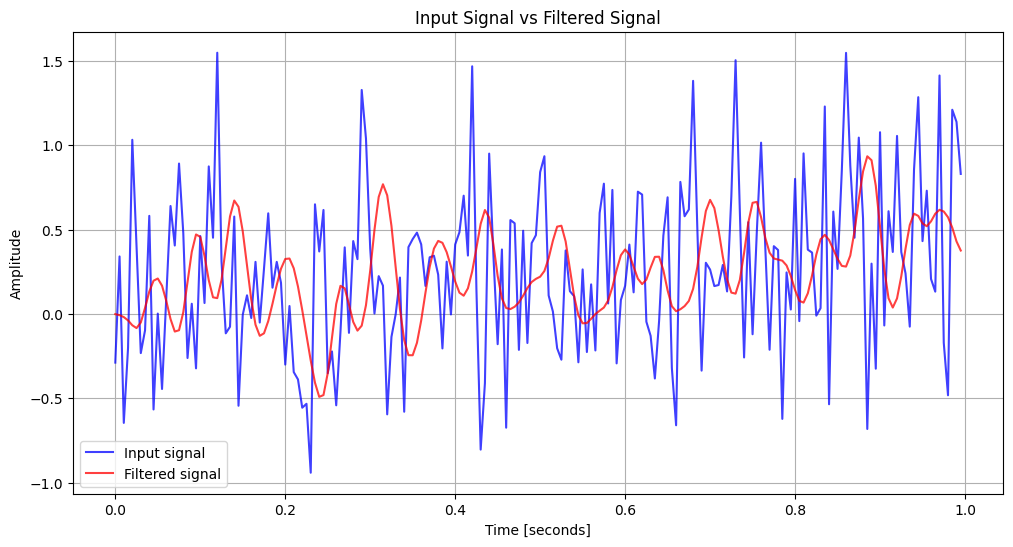

In [4]:
from scipy.signal import lfilter

# Membuat sinyal contoh (sine wave yang tercampur noise)
t = np.linspace(0, 1, 200, endpoint=False)
x = np.sin(2 * np.pi * 0.1 * t) + 0.5 * np.random.randn(t.shape[0])

# Aplikasikan filter pada sinyal
y = lfilter(b, a, x)

# Plot sinyal asli dan sinyal hasil filter
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b', alpha=0.75, label='Input signal')
plt.plot(t, y, 'r', alpha=0.75, label='Filtered signal')
plt.legend()
plt.title("Input Signal vs Filtered Signal")
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Sinyal dan filter
Pada bagian sebelumnya, kami telah memperkenalkan konsep sinyal, spektrum, dan bentuk-Z. Dalam proses perjalanan sinyal dari sumber ke penerima, urutan data mengalami perubahan dan transformasi. Transformasi ini disebabkan oleh perjalanan sinyal melalui berbagai perangkat komputasi yang mengimplementasikan masalah matematika tertentu. Dalam tugas pemrosesan sinyal digital, data melewati sirkuit digital yang disebut filter. Filter digital, seperti filter analog, memiliki karakteristik yang berbeda. Biasanya, karakteristik ini dinyatakan dalam representasi frekuensi - karakteristik frekuensi amplitudo dan frekuensi fasa filter. Filter digital digunakan terutama untuk meningkatkan kualitas sinyal - untuk mengisolasi sinyal dari urutan data, atau untuk menurunkan sinyal yang tidak diinginkan - untuk menekan sinyal tertentu dalam urutan sampel yang masuk.

Saat ini, filter digital digunakan hampir di semua tempat di mana pemrosesan sinyal diperlukan. Bahkan operasi matematika primitif (perkalian dan penambahan) dapat direpresentasikan sebagai filter digital. Akibatnya, semua perangkat yang ada di sekeliling kita (komputer, telepon, TV, dll.) mengandung sejumlah filter digital dalam berbagai jenis. Contohnya, televisi menggunakan filter untuk mengubah gambar output. Menyesuaikan kecerahan pada dasarnya adalah memfilter gambar.
Oleh karena itu, filter digital digunakan dalam berbagai macam tugas pemrosesan sinyal: analisis spektral, pemrosesan data audio dan video, pemrosesan ucapan, pemrosesan gerakan, dll. Seperti yang diterapkan pada tugas DSP, filter adalah sistem matematika tertentu yang mengubah bentuk sinyal input (amplitudo, fase, frekuensi).

Keuntungan dari filter digital:

- Kemungkinan untuk mendapatkan karakteristik yang tidak dapat diperoleh dengan metode analog (misalnya, FFT linier yang akurat).
- Filter digital lebih stabil terhadap perubahan lingkungan eksternal (suhu, kelembaban, tekanan). Oleh karena itu, filter digital tidak memerlukan kalibrasi konstan.
- Penyesuaian frekuensi pemrosesan sinyal yang mudah.
- Tergantung pada kecepatan pemrosesan dan frekuensi sinyal, satu filter dapat secara bersamaan memproses data dari beberapa saluran.
- Data sebelum dan sesudah filter dapat disimpan ke media apa pun. Sinyal analog lebih sulit untuk direkam (bagaimanapun juga, diperlukan konversi ke bentuk digital dan kembali lagi).
- Konsumsi daya yang rendah dan biaya yang rendah dibandingkan dengan filter analog.
- Akurasi perhitungan yang lebih tinggi (perangkat digital modern tidak terbatas dalam akurasi perhitungan).
- Kemudahan mendesain filter dengan karakteristik frekuensi yang kompleks.
- Dalam aplikasi biomedis, sulit untuk menggunakan filter analog pada frekuensi yang sangat rendah, tidak seperti filter digital.

Kekurangan filter digital :

- Kapasitas digit terbatas.
Dalam proses kalkulasi dalam filter digital dengan kapasitas digit yang terbatas, noise kuantisasi dan noise pembulatan akan terakumulasi. Salah satu tugas DSP yang khas adalah memilih ukuran bit filter yang sesuai.
- Batasan kecepatan pemrosesan. Biasanya, filter analog dapat memproses data pada frekuensi yang sangat tinggi.
- Filter digital dibatasi oleh laju sampling.
Perangkat keras. Karena sinyal nyata di alam bersifat kontinu, ADC dan DAC digunakan untuk memprosesnya. Kinerja perangkat ini juga menentukan kualitas sinyal digital (analog) yang dihasilkan.
Sinyal dan filter dicirikan oleh fungsi yang berbeda, tergantung pada cara mereka direpresentasikan:

Filter IIR 
(IIR - "infinite impulse response") adalah filter digital dengan respons impuls tak terbatas dalam waktu, yaitu memiliki jumlah koefisien yang sangat besar atau tak terbatas. Filter IIR juga disebut filter rekursif karena implementasinya menggunakan umpan balik (sinyal dari output filter melalui elemen penundaan memasuki filter dan membuat perubahan dengan sendirinya). Fungsi transfer filter IIR memiliki bentuk pecahan-rasional. Filter NIR utama yang dikenal adalah filter Chebyshev, filter Butterworth, filter Kalman, filter Bessel, dll.

Persamaan perbedaan filter NIR:

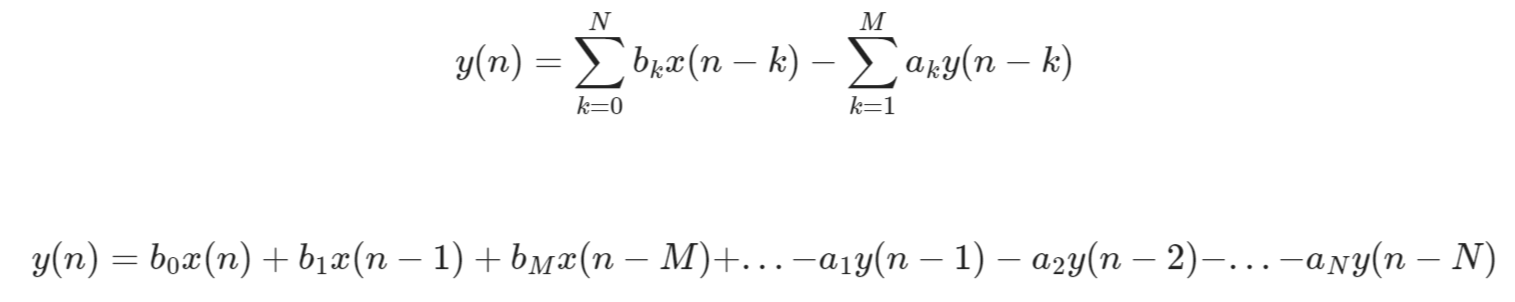

Seperti yang dapat dilihat, sinyal output mempengaruhi dirinya sendiri karena adanya umpan balik.

Karakteristik transmisi dari filter BIR:

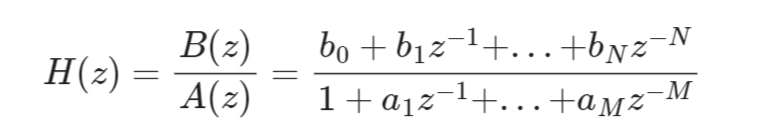


Tidak seperti filter FIR, filter IIR tidak selalu stabil. Untuk kestabilan filter IIR digital, semua kutub dari karakteristik transfer modulo harus benar-benar kurang dari satu (yaitu, berada di dalam lingkaran satuan pada bidang-z).

Urutan filter adalah derajat maksimum dalam ekspresi fungsi transfer H(z).

Fungsi transfer dapat direalisasikan melalui berbagai skema struktural. Yang paling umum adalah skema struktural seri dan paralel. Jika fungsi transfer filter rekursif direpresentasikan sebagai produk dari fungsi transfer orde pertama dan kedua, skema struktural akan berurutan. Jika fungsi transfer filter rekursif direpresentasikan sebagai jumlah dari fungsi transfer orde pertama dan kedua, skema strukturalnya akan paralel.

Rangkaian kanonik dan langsung

Diagram rangkaian filter digital dapat direpresentasikan dalam bentuk langsung dan kanonik. Filter digital dapat diimplementasikan dengan menggunakan tiga elemen digital: pengganda, penambah, dan unit penundaan. Jelas, pengganda diperlukan untuk mengalikan sampel dengan koefisien ak и ak, dan penambah menggabungkan hasil yang diperoleh.

Berikut adalah diagram struktural dari filter FIR non-rekursif, menurut Persamaan:

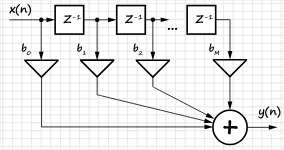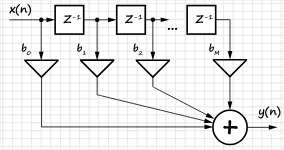

Jumlah garis tunda filter NIR adalah N + M

Diagram struktural dalam bentuk kanonik meminimalkan jumlah garis tunda karena menggunakan garis tunda yang umum. Penambah masukan - dengan umpan balik. Penambah keluaran - meringkas hasilnya. Konversi dari satu bentuk ke bentuk lainnya cukup sederhana dan sepele

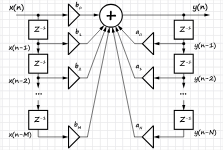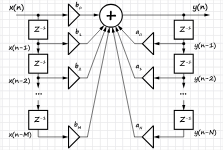

Jumlah garis tunda selalu satu lebih sedikit dari jumlah koefisien atau urutan filter. Tanggapan impuls dari filter FIR bertepatan dengan rangkaian koefisien filter ini.

Berikut ini adalah diagram struktural filter FIR terlihat agak lebih rumit karena adanya umpan balik:

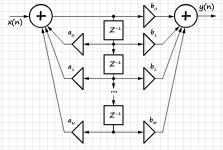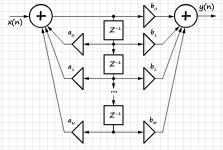

Pemilihan filter
Para perancang perangkat digital sering dihadapkan pada tugas untuk memilih jenis filter. Pilihan antara filter FIR dan BIH didasarkan pada kriteria berikut:

- Tanggapan fase dari filter FIR adalah nonlinier. Filter FIR dapat memiliki respons fase yang sangat linier. Ini berarti bahwa filter semacam itu tidak mendistorsi bentuk gelombang.
- Filter FIR stabil karena direalisasikan dengan bentuk non-rekursif. Filter FIR dapat menjadi tidak stabil.
- Dalam tugas nyata, ada pertanyaan tentang digitalisasi data (pembulatan, kuantisasi). Proses-proses ini berkontribusi lebih sedikit pada perangkat tanpa umpan balik, yaitu pada filter FIR.
- Realisasi AFC dengan bentuk yang kompleks atau bentuk persegi panjang maksimal akan membutuhkan sejumlah besar koefisien filter FIR. Filter FIR dapat mengatasi tugas ini dengan lebih baik.
- Filter FIR biasanya tidak memiliki filter analog yang setara.
- Filter FIR memungkinkan untuk dengan mudah mendapatkan karakteristik yang dibutuhkan (tingkat redaman, ketidakteraturan pada passband, frekuensi cut-off, dll.).
- Filter FIR secara signifikan lebih ekonomis dalam hal jumlah perkalian, operasi penjumlahan, dan jumlah jalur tunda.

Contoh
Misalkan ada sebuah filter yang dijelaskan oleh fungsi transfer berikut:
H(z) = b_0 + b_1z^-1 + b2z^-2/1 + a_1z^-1 + a_2z^-2
 
di mana :
N = 2, M = 2
b_{i} = {0.1, -0.6, 0.5}
a_{i} = {1, 0.7, -0.2}

Jumlah persamaan selisih untuk filter tertentu sama dengan jumlah penambah dalam rangkaian. Dengan mengetahui persamaan selisih, kita dapat menemukan respons impuls dari filter: impuls satuan adalah input (kondisi awal adalah nol).

Mari cari respon impuls menggunakan Python. Dengan menggunakan fungsi lfilter(b, a, x) kita mensimulasikan proses sinyal x yang melewati filter digital dengan koefisien karakteristik transfer a dan b.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

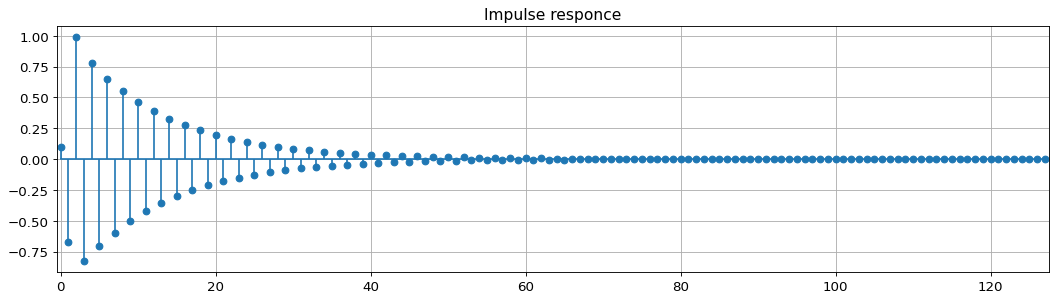

In [7]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(16, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Jika filter stabil, sampel y(n) berkurang nilainya seiring waktu.

Seperti yang dapat dilihat pada grafik sebelumnya - filter BIR yang dihitung stabil.

Filter NIR (SCIPY / MATLAB)
Di bawah ini adalah daftar fungsi filter NIR dasar untuk implementasi dalam python menggunakan paket sinyal - scipy.signal. Sebagian besar fungsi memiliki prototipe MATLAB yang serupa.

Deskripsi Fungsi :
iirdesign(wp, ws, gpass, gstop[, analog, ...]) Fungsi untuk kalkulasi filter digital secara lengkap. Mengembalikan koefisien a, b, nol dan kutub, dll.

iirfilter(N, Wn[, rp, rs, btype, analog, ...]) Implementasi filter BIR dari tipe dan orde N yang dipilih. Mengembalikan koefisien a, b, nol dan kutub, dll.

butter(N, Wn[, btype, analog, output, fs]) Filter Butterworth. Menerapkan filter orde-N dan mengembalikan koefisien filter.

buttord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter

cheby1(N, rp, Wn[, btype, analog, output, fs]) Filter tipe 1 Chebyshev. Mengimplementasikan filter orde-N dan mengembalikan koefisien filter.

cheb1ord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter

cheby2(N, rs, Wn[, btype, analog, output, fs]) Filter Chebyshev tipe 2. Mengimplementasikan filter orde-N dan mengembalikan koefisien filter.

cheb2ord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter

ellip(N, rp, rs, Wn[, btype, analog, output, fs]) Filter BIR elips (Kauer)

ellipord(wp, ws, gpass, gstop[, analog, fs]) Mengembalikan orde minimum yang diperlukan untuk mengimplementasikan filter dari nilai argumen masukan

bessel(N, Wn[, btype, analog, output, norm, fs]) Filter BIH Bessel.

iirnotch(w0, Q[, fs]) Filter penutup. Mengembalikan koefisien a, b. Argumen masukan adalah frekuensi sinyal, faktor kualitas dan frekuensi cutoff

iirpeak(w0, Q[, fs]) Filter bandpass. Fungsi ini mengembalikan koefisien a, b dari filter orde dua. Argumen masukan - frekuensi sinyal, faktor kualitas dan frekuensi cut-off.

Filter Butterworth
Contoh penerapan filter Butterworth orde 3. Mari kita tunjukkan bagaimana sinyal bising melewati filter tersebut:

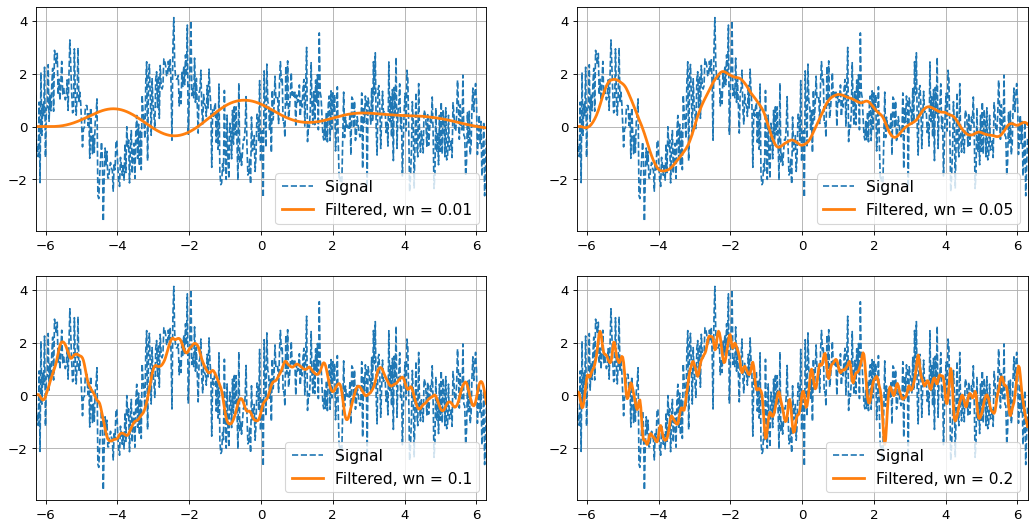

In [8]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)
    
# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')

Simetri respons impuls
Untuk memastikan linearitas FFC, maka perlu untuk memenuhi kondisi simetri respon impuls (atau koefisien) filter. Secara sederhana, filter FIR dengan FFC linier adalah simetris. Ada 4 jenis filter, yang berbeda berdasarkan paritas orde filter N dan jenis simetri:

- simetri positif, urutan genap,
- simetri negatif, urutan genap,
- simetri positif, urutan ganjil,
- simetri negatif, urutan ganjil.
Contohnya, untuk filter dengan simetri negatif, kita dapat memperoleh pergeseran fase phi/2. Filter semacam itu digunakan untuk mendesain pembeda dan transformasi Hilbert.

Amplop respons impuls dari filter FIR dibuat menurut hukum ~sin(x)/x terlepas dari jenis filter (low-pass, high-pass, diferensiator, band-pass, atau filter penolak band). Untuk memecahkan masalah praktis, kita tidak perlu memikirkan jenis filter yang dipilih.

Desain filter FIR
Yang dimaksud dengan "desain filter FIR" dalam banyak kasus adalah menemukan koefisiennya dari nilai respons frekuensi.

Ketika membuat filter FIR digital baru, seorang insinyur melewati tahap-tahap desain tertentu:

- Spesifikasi filter. Jenis filter (FIR, VHF, band-pass, band-rejector), jumlah koefisien N, respons frekuensi yang diperlukan, dengan toleransi untuk nonlinieritas pada pita atenuasi dan passband, dll. ditentukan.
- Perhitungan koefisien. Dengan metode dan cara apa pun yang tersedia, koefisien filter dihitung untuk memenuhi spesifikasi dari paragraf sebelumnya.
- Analisis efek digitalisasi terbatas. Pada tahap ini, pengaruh efek kuantisasi pada koefisien filter, data perantara dan output dievaluasi.
- Implementasi. Pada tahap ini filter dikembangkan dengan perangkat keras atau perangkat lunak: dalam bahasa pemrograman yang tersedia atau berdasarkan FPGA atau prosesor sinyal khusus.

Tahapan pengembangan bisa agak berbeda, tetapi esensi dari desain filter FIR digital selalu tetap sama.

Spesifikasi filter
Pada tahap ini, teknisi mencari solusi kompromi untuk mewujudkan filter FIR yang diperlukan dengan parameter yang diperlukan. Ada beberapa di antaranya, tetapi sering kali perlu mengorbankan satu parameter untuk mencapai nilai yang diperlukan untuk kuantitas lainnya.

A_pass - ketidakseragaman dalam passband,
A_stop adalah tingkat redaman pada pita penekanan,
F_pass- frekuensi batas dari passband,
F_stop - frekuensi batas dari pita redaman,
N - orde filter (jumlah koefisien filter).
Dalam praktiknya, parameter A_pass dan A_stop ditetapkan dalam desibel (dB), dan jarak antara F_pass dan F_stop menyatakan bandwidth transisi filter. Secara logis, nilai A_pass harus sekecil mungkin, A_stop sebesar mungkin, dan rasio F_pass/F_stop secara ideal cenderung satu (AFC persegi panjang yang ideal).

Jumlah rasio dimasukkan ke dalam spesifikasi filter karena ada alasannya. Seperti yang akan ditunjukkan di bawah ini, parameter respons frekuensi filter bergantung pada orde filter N dan digitalisasi koefisien.

Perhitungan koefisien filter

Ada banyak metode untuk menghitung koefisien filter - metode pembobotan fungsi jendela, metode pengambilan sampel frekuensi, berbagai metode optimal (Chebyshev) yang menggunakan algoritme Remez, dll. Semua metode memiliki keunikan dalam fitur-fiturnya dan memberikan hasil yang berbeda. Untuk metode pembobotan jendela, manifestasi negatifnya adalah efek Gibbs, yang memperkenalkan ketidakseragaman dan pencilan ke dalam respons frekuensi filter di antara titik-titik fungsi yang dihitung. Hal ini dapat diperjuangkan tanpa henti dan tidak berhasil, tetapi dalam praktiknya, toleransi diperkenalkan untuk ketidakseragaman dalam passband dan bandwidth penekanan.

Metode utama perhitungan koefisien untuk banyak filter adalah algoritma Remez yang dimodifikasi - "Algoritma Parks-McClellan". Ini adalah metode iteratif tidak langsung untuk menemukan nilai optimal dengan karakteristik filter Chebyshev. Keunikan metode ini adalah meminimalkan kesalahan pada pita redaman dan pita lolos dengan perkiraan Chebyshev dari respons impuls.

Cukup logis bahwa semakin besar jumlah koefisien, semakin kecil ketidakseragaman AFC dan semakin persegi panjang. Pilihan metode tergantung pada hasil akhir, tetapi semuanya bermuara pada tujuan yang sama - meminimalkan emisi dalam passband dan meningkatkan "keseragaman" AFC (sambil mempertahankan kondisi linearitas FFC).

Analisis konsekuensi dari kapasitas digit yang terbatas
Kapasitas digit koefisien adalah faktor utama yang menentukan jenis respons frekuensi. Pada contoh sirkuit terpadu logika terprogram (PLI) modern, kapasitas digit koefisien dapat dipilih dengan cara apa pun, tetapi nilai sebenarnya berada dalam kisaran 16 hingga 27 bit karena keunikan implementasi blok komputasi (DSP48).

Untuk orde tinggi dari filter, sering kali perlu untuk menyediakan rentang dinamis yang besar dari kisi-kisi bit, tetapi jika hal ini tidak dapat dilakukan, cepat atau lambat kesalahan kuantisasi mulai muncul. Karena kapasitas digit koefisien yang terbatas, respons frekuensi dimodifikasi, dan dalam beberapa kasus, respons frekuensi terdistorsi sedemikian rupa sehingga perlu mengorbankan parameter dari spesifikasi frekuensi untuk mencapai hasil yang dapat diterima. Bagaimanapun, ukuran bit representasi koefisien secara langsung mempengaruhi pelemahan maksimum yang mungkin terjadi A_stop. Oleh karena itu, jika Anda menggunakan kisi-kisi koefisien yang terlalu terbatas, terkadang tidak mungkin mencapai atenuasi yang diinginkan, bahkan dengan urutan filter yang sangat besar.

Realisasi
Dengan bantuan pustaka modern dalam berbagai bahasa pemrograman (C++, Python, MATLAB, dll.), implementasi perangkat lunak filter FIR menjadi mudah. Namun, implementasi perangkat keras pada mikrokontroler atau FPGA adalah tugas yang kompleks dan tidak sepele.

Implementasi filter FIR yang paling sederhana membutuhkan operasi penundaan, perkalian dengan koefisien, dan penambahan hasil perkalian. Simpul utama yang digunakan untuk mengimplementasikan filter FIR pada FPGA adalah blok DSP bilangan bulat. Semua operasi matematika terjadi di blok ini - perkalian sampel input dengan koefisien filter, penundaan sinyal input, penjumlahan data. Node DSP modern berisi pre adder, sehingga operasi penjumlahan untuk filter dengan IC simetris pun dapat dilakukan di dalam node ini. Selain blok DSP, filter membutuhkan memori untuk menyimpan koefisien dan mengimplementasikan tautan penundaan. Biasanya, FPGA memiliki lebih dari cukup sumber daya ini.

Penghitungan filter FIR dalam Python
Implementasi perangkat lunak filter FIR - pencarian koefisien respons impuls.

Filter FIR dihitung menggunakan beberapa fungsi dari paket scipy.signal. Mari kita buat daftar semua metode desain filter FIR dan pertimbangkan masing-masing secara rinci.

Fungsi                                            Deskripsi 
firls(numtaps, bands, desired[, weight, nyq, fs]) Perhitungan filter FIR menggunakan metode kuadrat terkecil.

firwin(numtaps, cutoff[, width, window, ...]) Implementasi filter FIR orde-N menggunakan fungsi window. Frekuensi cutoff ditentukan.

firwin2(numtaps, freq, gain[, nfreqs, ...]) Perhitungan filter menggunakan fungsi window. Satu set frekuensi dan amplitudo yang dinormalisasi pada frekuensi-frekuensi ini ditentukan

remez(numtaps, bands, desired[, weight, Hz, ...]) Perhitungan filter optimal menggunakan algoritma remez

group_delay(system[, w, whole, fs]) Fungsi tambahan untuk menghitung penundaan grup. Parameter masukan - larik koefisien a, b

get_window(window, Nx, fftbins = True)[source] Mengembalikan koefisien fungsi window dengan panjang yang dibutuhkan

Perhitungan filter FIR dengan metode window:
Metode firwin dan firwin2 mengembalikan koefisien filter FIR.

Metode firwin

numtaps - urutan filter,
cutoff - frekuensi cutoff relatif terhadap frekuensi sampling fs.
width - jika nilai diberikan, ini menunjukkan lebar transisi dari passband ke bandwidth penekanan.
window - fungsi jendela. Ini digunakan bersama dengan metode get_window atau nama jendela diatur secara langsung.
fs - frekuensi sampling atau frekuensi Nyquist. Jika nilainya tidak ditentukan, nilainya adalah satu.

Metode firwin2
numtaps - urutan filter,
freq - urutan frekuensi monoton yang tidak menurun. Semua elemen harus non-negatif dan kurang dari atau sama dengan frekuensi Nyquist yang ditentukan oleh parameter fs.
gain - urutan amplitudo yang berisi amplifikasi dan redaman yang diperlukan pada nilai frekuensi yang diberikan dari freq.
jendela - fungsi jendela. Ini digunakan bersama dengan metode get_window atau nama jendela ditentukan secara langsung.
fs - frekuensi sampling atau frekuensi Nyquist. Jika nilainya tidak ditentukan, nilainya akan menjadi satu.

Fungsi jendela
Bagian terpisah dikhususkan untuk fungsi jendela dan kekhasannya, tetapi mari kita buat daftar fungsi jendela yang paling sering digunakan dalam tugas-tugas praktis: Kaiser, Gauss, Blackman-Harris, jendela datar, Hamming, Hahn, dan sebagainya.

Metode get_window digunakan untuk memilih fungsi jendela. Masukkan argumen - nama jendela dan panjang respons impuls.

Fungsi ini mengembalikan larik koefisien satu dimensi - nilai respons impuls. Koefisien-koefisien ini "ditumpangkan" pada respons impuls filter FIR oleh operasi konvolusi.

Penundaan kelompok
Ini adalah fungsi tambahan untuk menghitung penundaan grup filter digital. Parameter input adalah larik koefisien a, b. Metode ini mengembalikan satu set frekuensi dan larik penundaan grup yang sesuai untuk frekuensi-frekuensi ini.

Contoh
Contoh pertama menggunakan fungsi firwin2. Tetapkan larik frekuensi yang dinormalisasi dari 0 hingga 1. Atur penguatan pada frekuensi yang dipilih, serta urutan filter. Mari kita buat respons impuls.

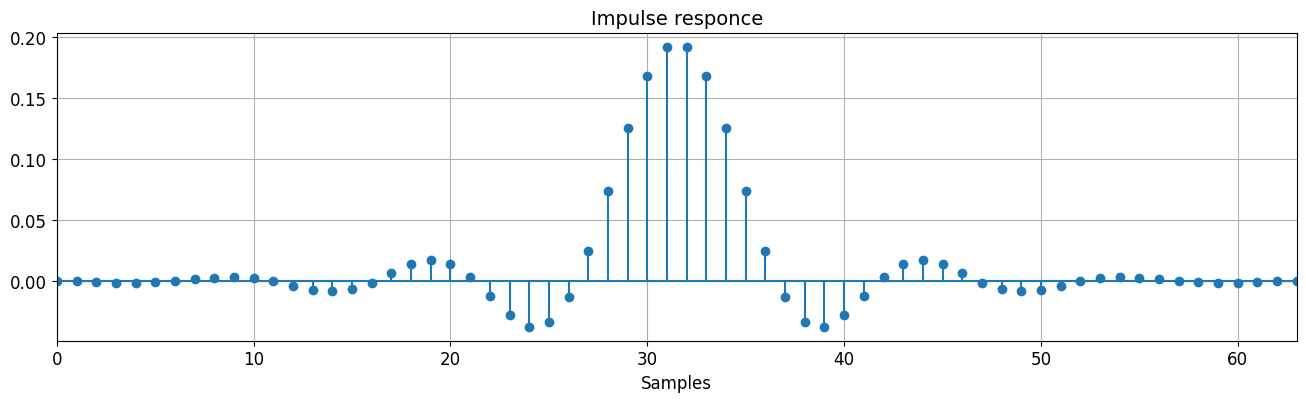

In [9]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse responce')
plt.stem(taps, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

Mari kita buat AFC dari filter bandpass dan filter low-pass dengan menggunakan tiga metode: firls(), remez(), firwin2().

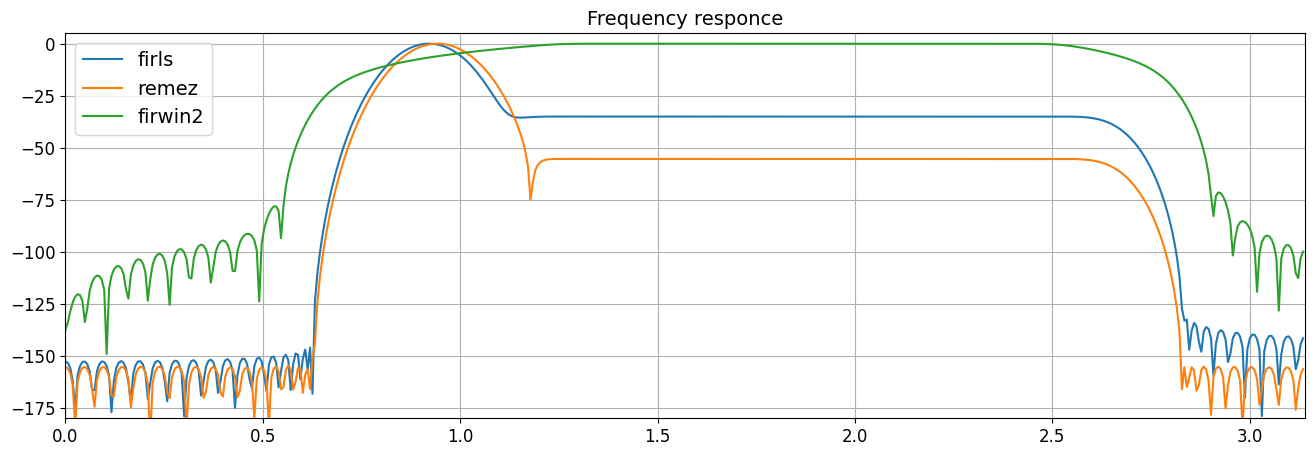

In [10]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(16, 5))
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

Filter FIR Kaiser
Mari kita tunjukkan, bagaimana sinyal harmonik yang bising melewati filter FIR. Kami juga akan menambahkan beberapa sinyal harmonik frekuensi tinggi dengan amplitudo yang berbeda pada sinyal ini.

Seperti yang dapat dilihat, sinyal derau dalam domain waktu tidak dapat dianalisis dengan cara apa pun. Dengan melewatkan sinyal seperti itu melalui filter FIR dengan frekuensi cut-off yang telah dipilih sebelumnya, dimungkinkan untuk mengisolasi sinyal yang diinginkan dari derau.

Perlu dicatat bahwa semua sinyal dan derau, yang masuk ke dalam bandwidth filter, tetap ada dan berkontribusi pada karakteristik kualitatif sinyal yang dihasilkan.

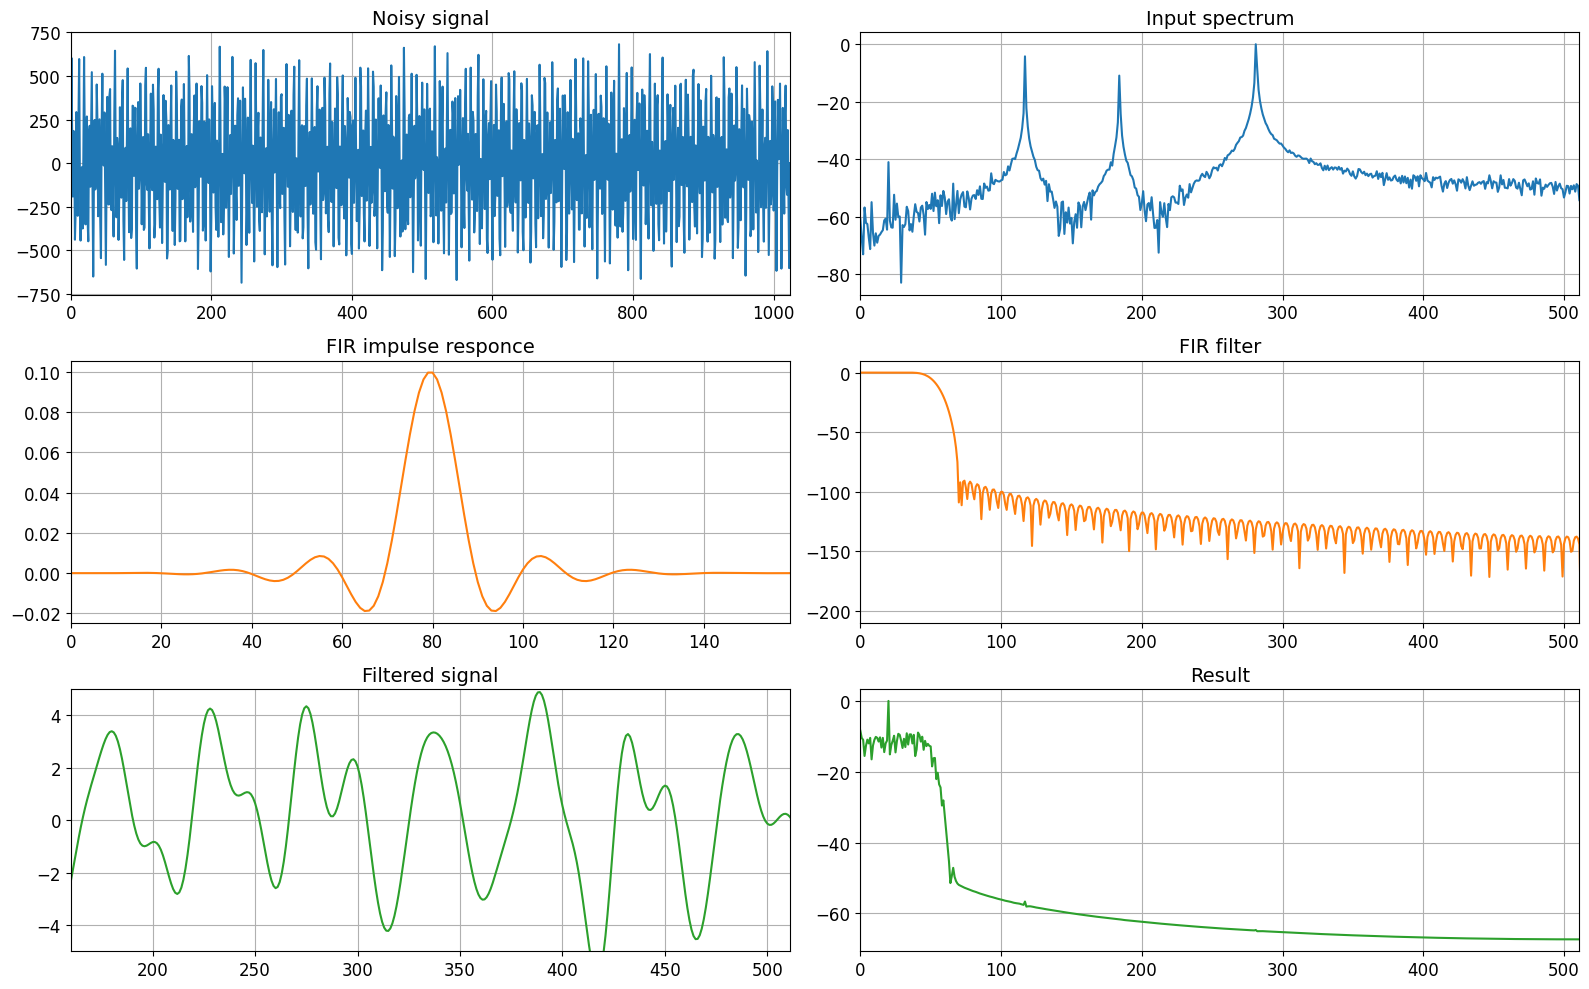

In [11]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N)) 
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))
    
    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)
    
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Gambar di atas menunjukkan bahwa sinyal output yang difilter dengan distorsi kecil, mirip dengan sinyal harmonik, yang memang harus diperoleh. Sayangnya, tidak mungkin mencapai bentuk osilasi harmonik yang ideal dengan menggunakan pemfilteran FIR atau BIH, karena tugas utama filter adalah memotong komponen spektral yang tidak perlu. Untuk meningkatkan kualitas sinyal yang difilter, metode pemrosesan sinyal digital lainnya (spektral dan korelasi) digunakan.

Ini menyimpulkan bagian tentang pemfilteran digital. Bagian berikut ini akan menjelaskan secara rinci fungsi jendela, tugas pemrosesan sinyal multirate - dekimasi dan interpolasi, perhitungan korektor filter, dll.